# Student Performance Indicator

### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## 1) Problem Statement 

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

- The data consists of 8 column and 1000 rows.

### 2.1) Import Data And Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Import the CSV Data as Pandas DataFrame**

In [3]:
df = pd.read_csv('data/stud.csv')

**Define a function for the overlook of dataset**

In [7]:
def check_df(dataset, head = 5):
    print("-"*10 + ' Shape Information of Dataset ' + "-"*10, end = '\n'*2)
    print(f" The dataset consist of {dataset.shape[0]} rows & {dataset.shape[1]} columns", end = '\n'*2)
    print("-"*10 + ' General informations about to Dataset ' + "-"*10, end = '\n'*2)
    print(dataset.info(), end = '\n'*2)
    print("-"*10 + " Are there any null values in the dataset? " + "-"*10, end = '\n'*2)
    print(dataset.isnull().sum().sort_values(ascending = False), end = '\n'*2)
    print("-"*10 + " Are there any dublicated values in the dataset? " + "-"*10, end = '\n'*2)
    print(dataset[dataset.duplicated()].shape[0], end = '\n'*2)
    print("-"*10 + " What is the Number of Unique Classes in the Variables ? " + ' ' + "-"*10, end = '\n'*2)
    print(dataset.nunique(), end = '\n'*2)
    print('-'*10 + ' Descriptive Statistics of Numerical Features ' + "-"*10, end = '\n'*2)
    print(dataset.describe().T, end = '\n'*2)
    print("-"*10 + 'Quantiles of Numerical Features' + "-"*10, end ='\n'*2)
    print(dataset.describe([0,0.25, 0.50,0.75,1.0]).T, end = '\n'*2)

In [10]:
check_df(df)

---------- Shape Information of Dataset ----------

 The dataset consist of 1000 rows & 8 columns

---------- General informations about to Dataset ----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

---------- Are there any null values in the dataset? ----------

gender                         0
race_ethni

### 2.2) Dataset Information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,- master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3) Data Checks to perform


### 3.1) Check Missing values
- We executed to the check_df() function above and results is show us to the : 
    - There is not any missing value in the dataset.
    - There is not any duplicated value in the dataset.
    - When check to the datatypes, the "gender", "race_ethnicity", "parental_level_of_education", "lunch","test_preparation_course" columns are object type columns and
        the "math_score", "reading_score","writing_score" columns are numerical type columns. 
    - By the check_df() method, 
    - "Gender" column has 2 unique values,
    - "race_ethnicity" column has 5 unique values,
    - "parental_level_of_education" column has 6 unique values,
    - "lunch" column has 2 unique values,
    - "test_preparation_course" column has 2 unique values.
    - End of the returns of check_df() function, we can see the distributions of numerical columns. Based to the results:
        - From above description of numerical data, all means are very close to each other - between 66 and 68.05;
        - All standard deviations are also close - between 14.6 and 15.19;
        - While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

### 3.2) Exploring Data 


In [4]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [6]:
def grab_cols(dataframe, cat_th = 10):
    categorical_columns = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and dataframe[col].nunique() < cat_th]
    numerical_columns = [col for col in dataframe.columns if dataframe[col].dtype != 'O']
    return categorical_columns, numerical_columns

In [11]:

print('We have {} numerical features : {}'.format(len(grab_cols(df,10)[1]), grab_cols(df,10)[1]))
print('\nWe have {} categorical features : {}'.format(len(grab_cols(df,10)[0]), grab_cols(df,10)[0]))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


- After this section, as we can see we have 3 numerical columns refers to the mathematical score, reading score and writing score. But we can reduce to this 3 columns to the 1 column called by average. For this, we get sum of the these 3 column and divide it to the 3 . I mean we calculate to the arithmetical average. 

In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3

In [13]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


- Based on the result upside, we get some insights, 
    - From above values we get students have performed the worst in Maths
    - Best performance is in reading section

## 4) Exploring Data - Data Visualization

### 4.1) Visualize average score distribution to make some conclusion
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1) Histogram & KDE

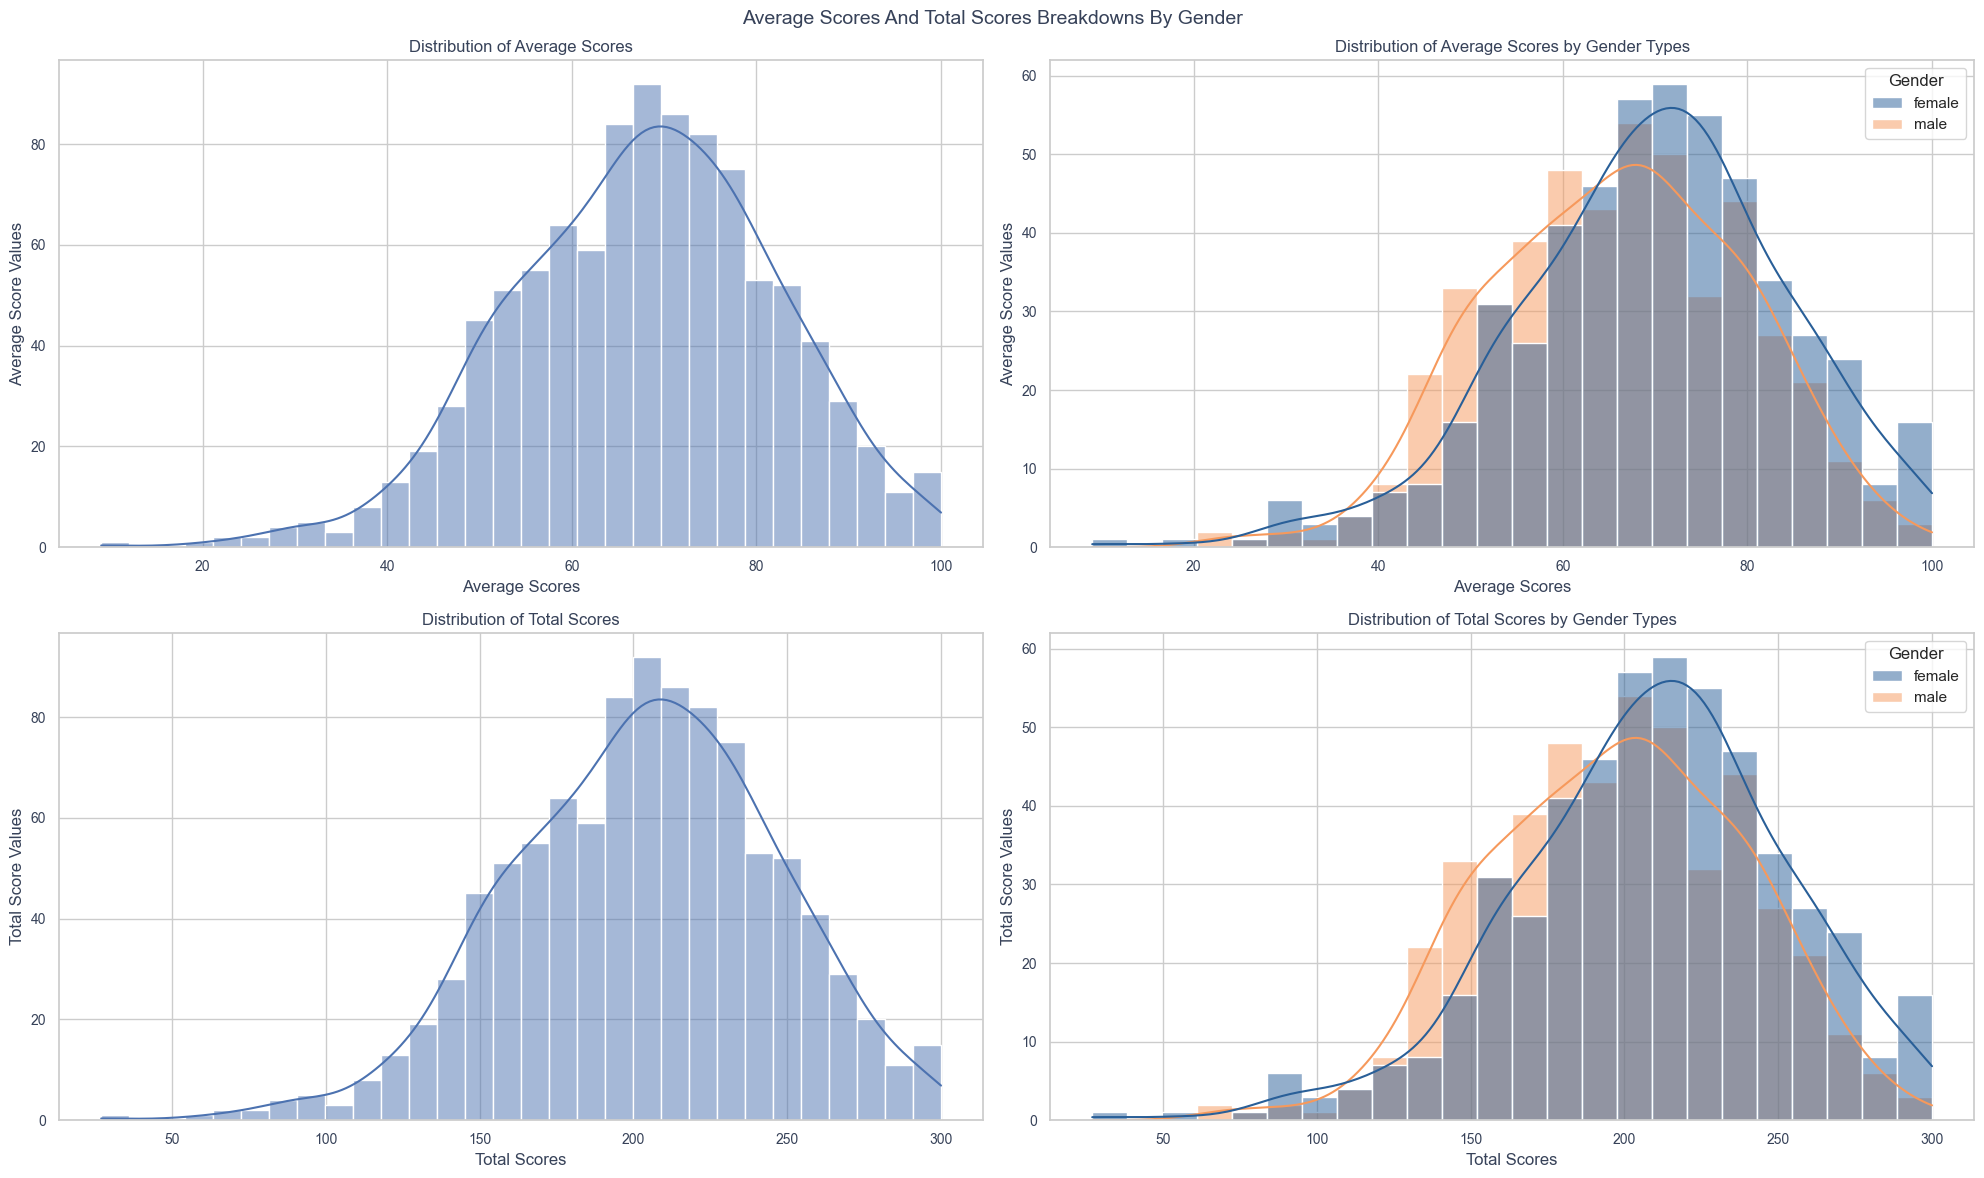

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
sns.set_theme(style = "whitegrid")

colors = ['#295F98', '#F6995C']

sns.histplot(data = df, x='average', palette = colors,bins = 30,kde = True, ax = axs[0, 0])
axs[0, 0].set_title("Distribution of Average Scores", color = '#374259', fontsize = 12)
axs[0, 0].set_xlabel("Average Scores", color = '#374259')
axs[0, 0].set_ylabel("Average Score Values", color = '#374259')
for label in axs[0, 0].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[0, 0].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)

sns.histplot(data=df, x='average', hue='gender', palette = colors,kde = True, ax = axs[0, 1])
axs[0, 1].set_title("Distribution of Average Scores by Gender Types", color = '#374259', fontsize = 12)
axs[0, 1].set_xlabel("Average Scores", color = '#374259')
axs[0, 1].set_ylabel("Average Score Values", color = '#374259')
for label in axs[0, 1].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[0, 1].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
    
axs[0, 1].legend_.set_title("Gender")

sns.histplot(data = df, x='total_score', palette = colors,bins = 30,kde = True, ax = axs[1, 0])
axs[1, 0].set_title("Distribution of Total Scores", color = '#374259', fontsize = 12)
axs[1, 0].set_xlabel("Total Scores", color = '#374259')
axs[1, 0].set_ylabel("Total Score Values", color = '#374259')
for label in axs[1, 0].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[1, 0].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)

sns.histplot(data=df, x='total_score', hue='gender', palette = colors,kde = True, ax = axs[1, 1])
axs[1, 1].set_title("Distribution of Total Scores by Gender Types", color = '#374259', fontsize = 12)
axs[1, 1].set_xlabel("Total Scores", color = '#374259')
axs[1, 1].set_ylabel("Total Score Values", color = '#374259')
for label in axs[1, 1].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[1, 1].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
    
axs[1, 1].legend_.set_title("Gender")

plt.suptitle("Average Scores And Total Scores Breakdowns By Gender", fontsize=14, color='#374259')
plt.tight_layout()
plt.show()

- Female students tend to perform well then male students.

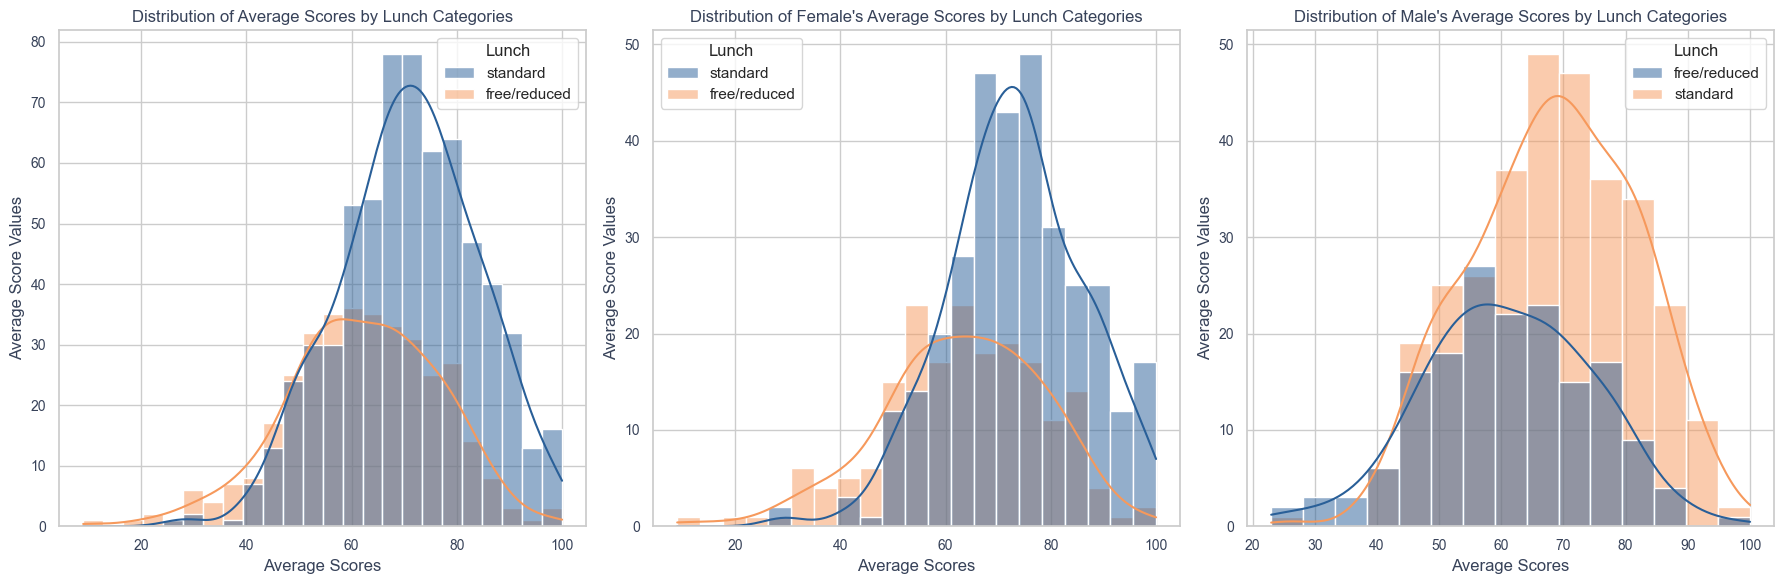

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.set_theme(style = "whitegrid")

colors = ['#295F98', '#F6995C']

sns.histplot(data=df, x='average', hue='lunch', palette = colors,kde = True, ax = axs[0])
axs[0].set_title("Distribution of Average Scores by Lunch Categories", color = '#374259', fontsize = 12)
axs[0].set_xlabel("Average Scores", color = '#374259')
axs[0].set_ylabel("Average Score Values", color = '#374259')
for label in axs[0].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[0].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
    
axs[0].legend_.set_title("Lunch")

sns.histplot(data=df[(df['gender'] == 'female')], x='average', hue='lunch', palette = colors,kde = True, ax = axs[1])
axs[1].set_title("Distribution of Female's Average Scores by Lunch Categories", color = '#374259', fontsize = 12)
axs[1].set_xlabel("Average Scores", color = '#374259')
axs[1].set_ylabel("Average Score Values", color = '#374259')
for label in axs[1].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[1].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
    
axs[1].legend_.set_title("Lunch")

sns.histplot(data=df[(df['gender'] == 'male')], x='average', hue='lunch', palette = colors,kde = True, ax = axs[2])
axs[2].set_title("Distribution of Male's Average Scores by Lunch Categories", color = '#374259', fontsize = 12)
axs[2].set_xlabel("Average Scores", color = '#374259')
axs[2].set_ylabel("Average Score Values", color = '#374259')
for label in axs[2].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[2].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
    
axs[2].legend_.set_title("Lunch")
plt.tight_layout()
plt.show()

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

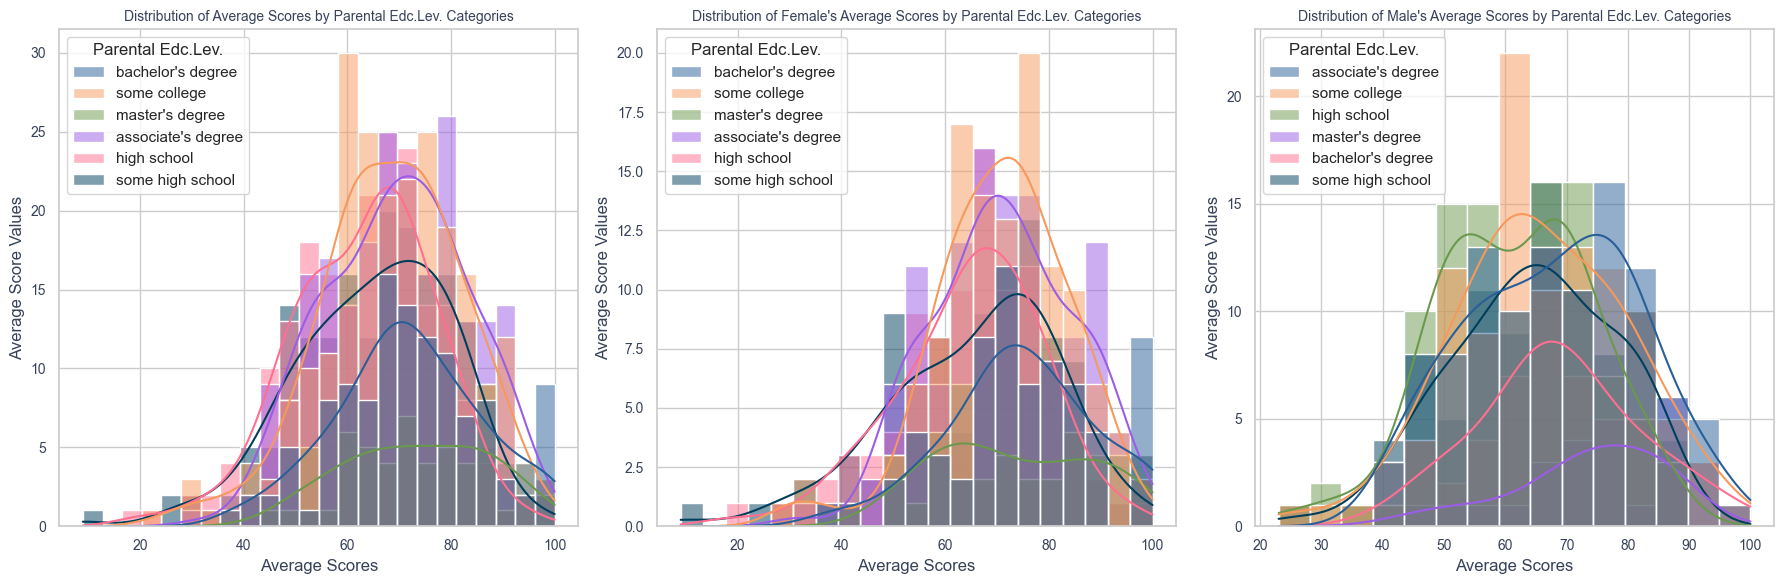

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.set_theme(style = "whitegrid")

colors = ['#295F98', '#F6995C', '#6A994E', '#9B5DE5', '#FF6F91', '#003F5C'] 

sns.histplot(data=df, x='average', hue='parental_level_of_education', palette = colors,kde = True, ax = axs[0])
axs[0].set_title("Distribution of Average Scores by Parental Edc.Lev. Categories", color = '#374259', fontsize = 10)
axs[0].set_xlabel("Average Scores", color = '#374259')
axs[0].set_ylabel("Average Score Values", color = '#374259')
for label in axs[0].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[0].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
    
axs[0].legend_.set_title("Parental Edc.Lev.")

sns.histplot(data=df[(df['gender'] == 'female')], x='average', hue='parental_level_of_education', palette = colors,kde = True, ax = axs[1])
axs[1].set_title("Distribution of Female's Average Scores by Parental Edc.Lev. Categories", color = '#374259', fontsize = 10)
axs[1].set_xlabel("Average Scores", color = '#374259')
axs[1].set_ylabel("Average Score Values", color = '#374259')
for label in axs[1].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[1].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
    
axs[1].legend_.set_title("Parental Edc.Lev.")

sns.histplot(data=df[(df['gender'] == 'male')], x='average', hue='parental_level_of_education', palette = colors,kde = True, ax = axs[2])
axs[2].set_title("Distribution of Male's Average Scores by Parental Edc.Lev. Categories", color = '#374259', fontsize = 10)
axs[2].set_xlabel("Average Scores", color = '#374259')
axs[2].set_ylabel("Average Score Values", color = '#374259')
for label in axs[2].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[2].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
    
axs[2].legend_.set_title("Parental Edc.Lev.")
plt.tight_layout()
plt.show()

- In general parent's education don't help student perform well in exam.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 2nd plot we can see there is no effect of parent's education on female students.

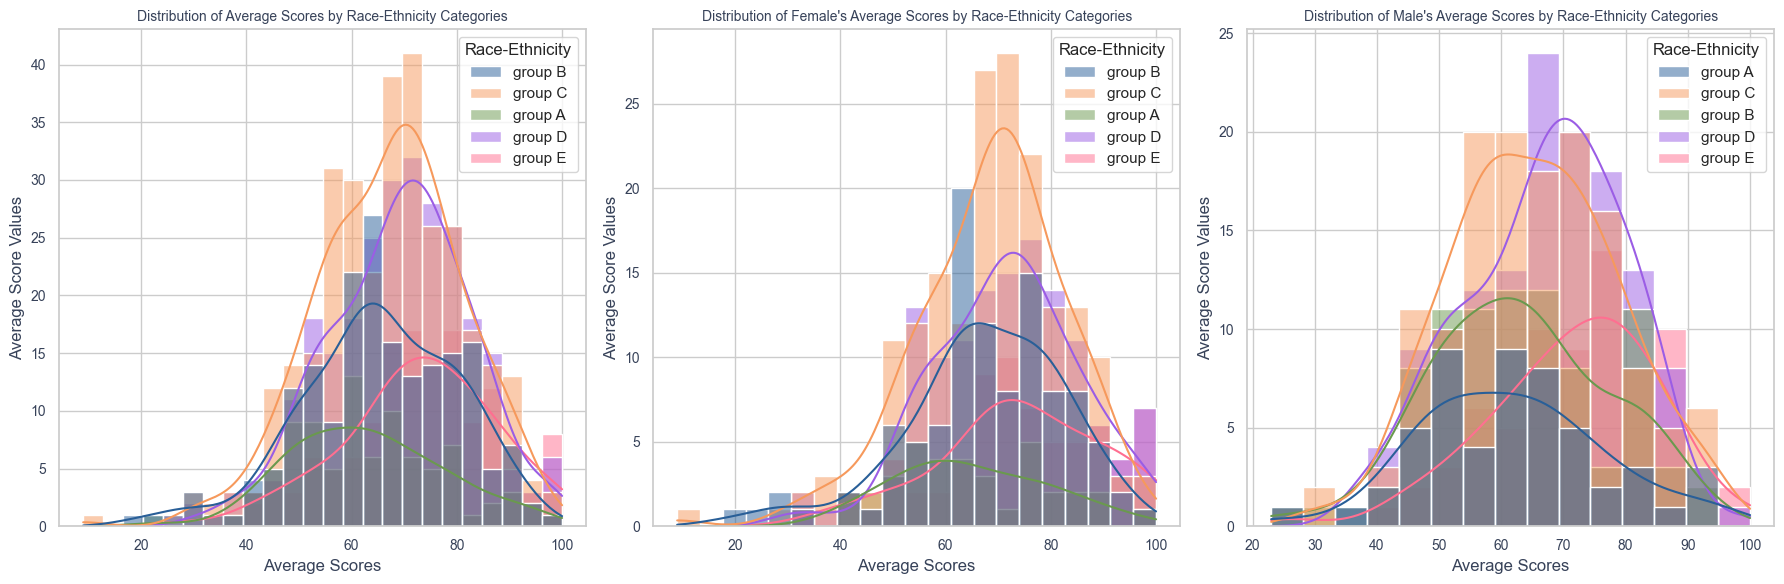

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.set_theme(style = "whitegrid")

colors = ['#295F98', '#F6995C', '#6A994E', '#9B5DE5', '#FF6F91'] 

sns.histplot(data=df, x='average', hue='race_ethnicity', palette = colors,kde = True, ax = axs[0])
axs[0].set_title("Distribution of Average Scores by Race-Ethnicity Categories", color = '#374259', fontsize = 10)
axs[0].set_xlabel("Average Scores", color = '#374259')
axs[0].set_ylabel("Average Score Values", color = '#374259')
for label in axs[0].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[0].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
    
axs[0].legend_.set_title("Race-Ethnicity")

sns.histplot(data=df[(df['gender'] == 'female')], x='average', hue='race_ethnicity', palette = colors,kde = True, ax = axs[1])
axs[1].set_title("Distribution of Female's Average Scores by Race-Ethnicity Categories", color = '#374259', fontsize = 10)
axs[1].set_xlabel("Average Scores", color = '#374259')
axs[1].set_ylabel("Average Score Values", color = '#374259')
for label in axs[1].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[1].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
    
axs[1].legend_.set_title("Race-Ethnicity")

sns.histplot(data=df[(df['gender'] == 'male')], x='average', hue='race_ethnicity', palette = colors,kde = True, ax = axs[2])
axs[2].set_title("Distribution of Male's Average Scores by Race-Ethnicity Categories", color = '#374259', fontsize = 10)
axs[2].set_xlabel("Average Scores", color = '#374259')
axs[2].set_ylabel("Average Score Values", color = '#374259')
for label in axs[2].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[2].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
    
axs[2].legend_.set_title("Race-Ethnicity")
plt.tight_layout()
plt.show()

- Students of group A and group B tends to perform poorly in exam.

- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### 4.2) Maximum Score Of Students In All Three Subjects

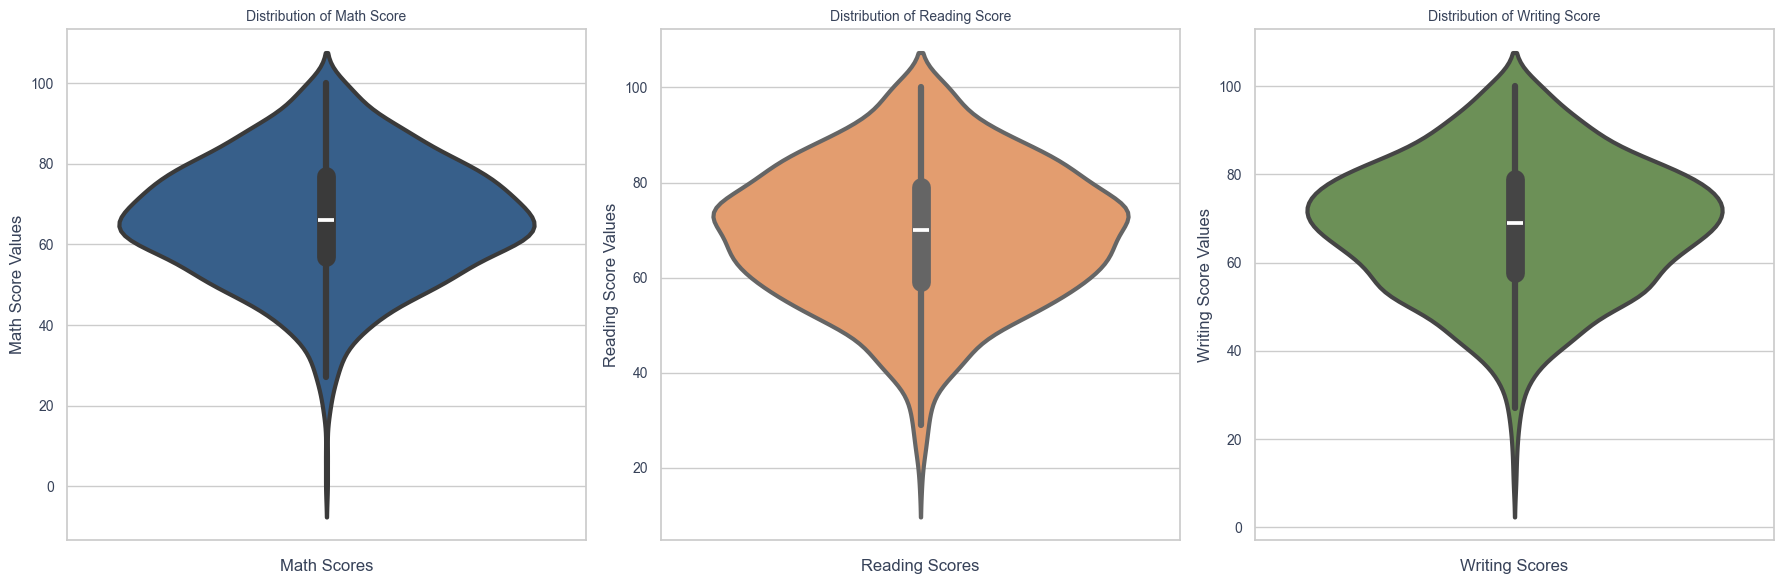

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.set_theme(style = "whitegrid")

colors = ['#295F98', '#F6995C', '#6A994E']

sns.violinplot(data=df, y='math_score', color = colors[0],linewidth=3, ax = axs[0])
axs[0].set_title("Distribution of Math Score", color = '#374259', fontsize = 10)
axs[0].set_xlabel("Math Scores", color = '#374259')
axs[0].set_ylabel("Math Score Values", color = '#374259')
for label in axs[0].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[0].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)

sns.violinplot(data=df, y='reading_score', color = colors[1],linewidth=3, ax = axs[1])
axs[1].set_title("Distribution of Reading Score", color = '#374259', fontsize = 10)
axs[1].set_xlabel("Reading Scores", color = '#374259')
axs[1].set_ylabel("Reading Score Values", color = '#374259')
for label in axs[1].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[1].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)

sns.violinplot(data=df, y='writing_score', color = colors[2],linewidth=3, ax = axs[2])
axs[2].set_title("Distribution of Writing Score", color = '#374259', fontsize = 10)
axs[2].set_xlabel("Writing Scores", color = '#374259')
axs[2].set_ylabel("Writing Score Values", color = '#374259')
for label in axs[2].get_xticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
for label in axs[2].get_yticklabels():
    label.set_color('#374259')
    label.set_fontsize(10)
plt.tight_layout()
plt.show()

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3) Multivariate Analysis Using Pieplot

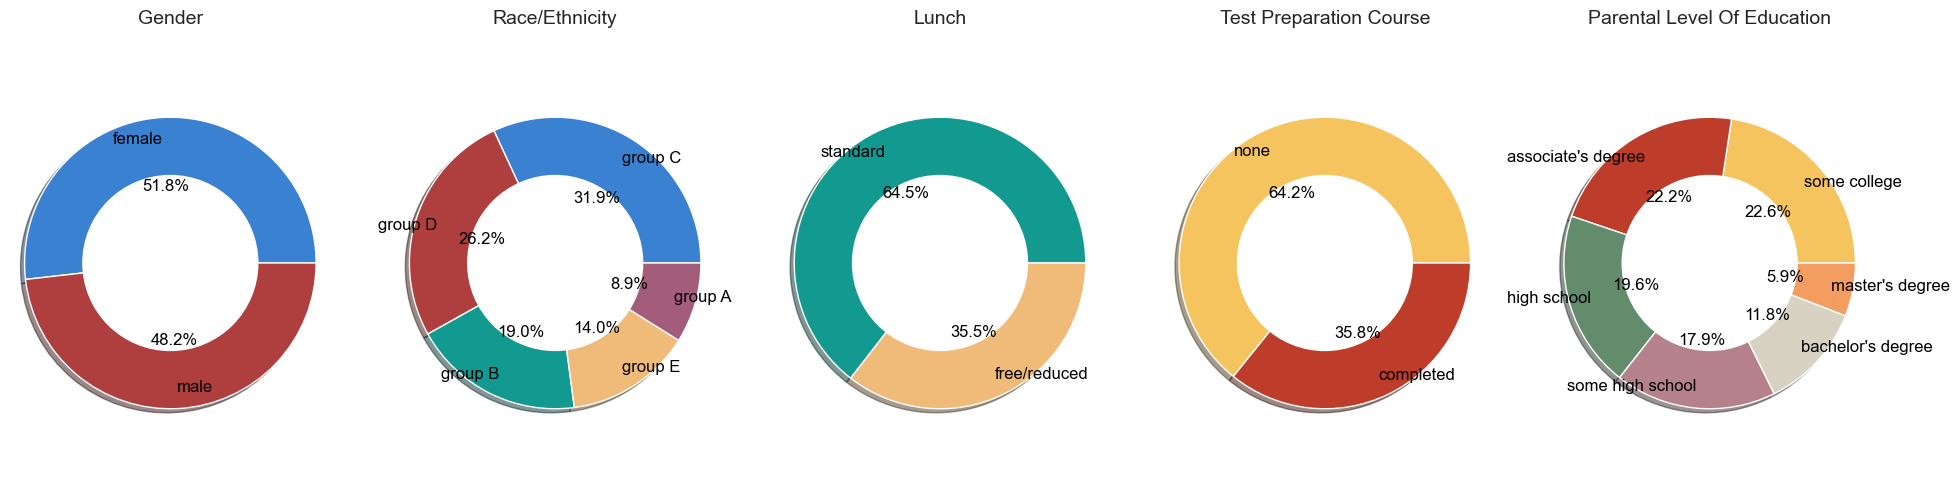

In [94]:
fig, axs = plt.subplots(1, 5, figsize=(24, 6))
sns.set_theme(style = "whitegrid")

size_gender = df['gender'].value_counts()
labels_gender = size_gender.index.tolist()
color_gender = ["#3A81D1",'#AF3E3E']
axs[0].pie(size_gender, radius = 1, labels = labels_gender, colors = color_gender ,shadow=True, labeldistance = 0.85,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,autopct='%1.1f%%',  textprops=dict(color='black', fontsize=12))
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
axs[0].add_artist(centre_circle)
axs[0].axis('equal')
axs[0].set_title('Gender', fontsize=14)


size_race = df['race_ethnicity'].value_counts()
labels_race = size_race.index.tolist()
color_race = ["#3A81D1",'#AF3E3E','#129990','#F0BB78', '#A35C7A']
axs[1].pie(size_race, radius = 1, labels = labels_race, colors = color_race ,shadow=True, labeldistance = 0.85,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,autopct='%1.1f%%',  textprops=dict(color='black', fontsize=12))
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
axs[1].add_artist(centre_circle)
axs[1].axis('equal')
axs[1].set_title('Race/Ethnicity', fontsize=14)


size_lunch = df['lunch'].value_counts()
labels_lunch = size_lunch.index.tolist()
color_lunch = ['#129990','#F0BB78']
axs[2].pie(size_lunch, radius = 1, labels = labels_lunch, colors = color_lunch ,shadow=True, labeldistance = 0.85,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,autopct='%1.1f%%',  textprops=dict(color='black', fontsize=12))
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
axs[2].add_artist(centre_circle)
axs[2].axis('equal')
axs[2].set_title('Lunch', fontsize=14)


size_test = df['test_preparation_course'].value_counts()
labels_test = size_test.index.tolist()
color_test = ["#F5C45E",'#BE3D2A']
axs[3].pie(size_test, radius = 1, labels = labels_test, colors = color_test ,shadow=True, labeldistance = 0.85,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,autopct='%1.1f%%',  textprops=dict(color='black', fontsize=12))
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
axs[3].add_artist(centre_circle)
axs[3].axis('equal')
axs[3].set_title('Test Preparation Course', fontsize=14)

size_paredu = df['parental_level_of_education'].value_counts()
labels_paredu = size_paredu.index.tolist()
color_paredu = ["#F5C45E",'#BE3D2A','#638C6D', '#B5828C', '#D8D2C2', '#F39E60']
axs[4].pie(size_paredu, radius = 1, labels = labels_paredu, colors = color_paredu ,shadow=True, labeldistance = 0.85,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,autopct='%1.1f%%',  textprops=dict(color='black', fontsize=12))
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
axs[4].add_artist(centre_circle)
axs[4].axis('equal')
axs[4].set_title('Parental Level Of Education', fontsize=14)

plt.show()

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4) Feature Wise Visualization

#### 4.4.1) Gender Column

- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

**UNIVARIATE ANALYSIS (How is distribution of Gender?)**

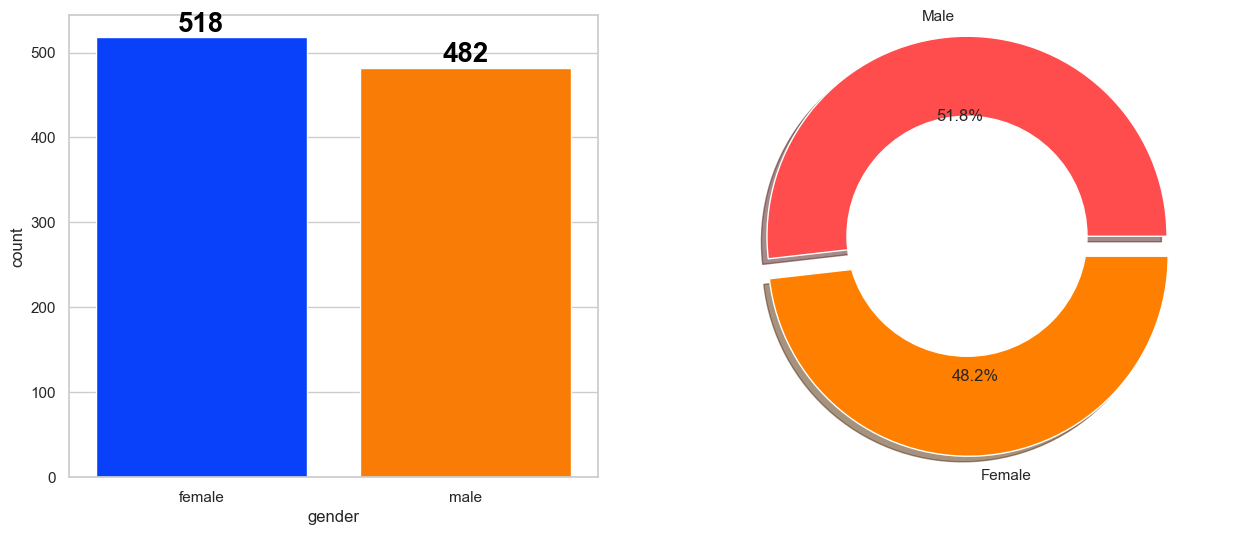

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20, weight = 'bold')
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])

centre_circle = plt.Circle((0, 0), 0.6, fc='white')
plt.gca().add_artist(centre_circle)  # aktif eksene ekle

plt.gca().axis('equal')  # daireyi düzgün çiz
plt.show()

- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

**BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )**

In [101]:
gender_group = df.groupby('gender').agg({'math_score':'mean', 'reading_score': 'mean', 'writing_score' : 'mean', 'average':'mean'}).reset_index()
gender_group

,gender,math_score,reading_score,writing_score,average
0,female,63.63,72.61,72.47,69.57
1,male,68.73,65.47,63.31,65.84


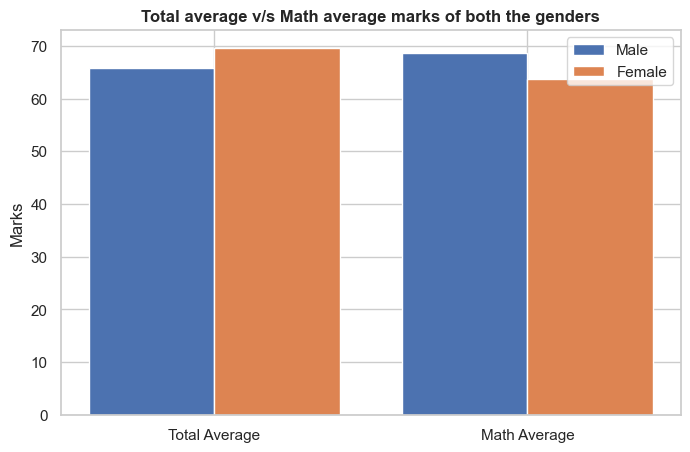

In [104]:

plt.figure(figsize=(8, 5))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2) Race/Ethnicity Column

- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

**UNIVARIATE ANALYSIS ( How is Group wise distribution ?)**

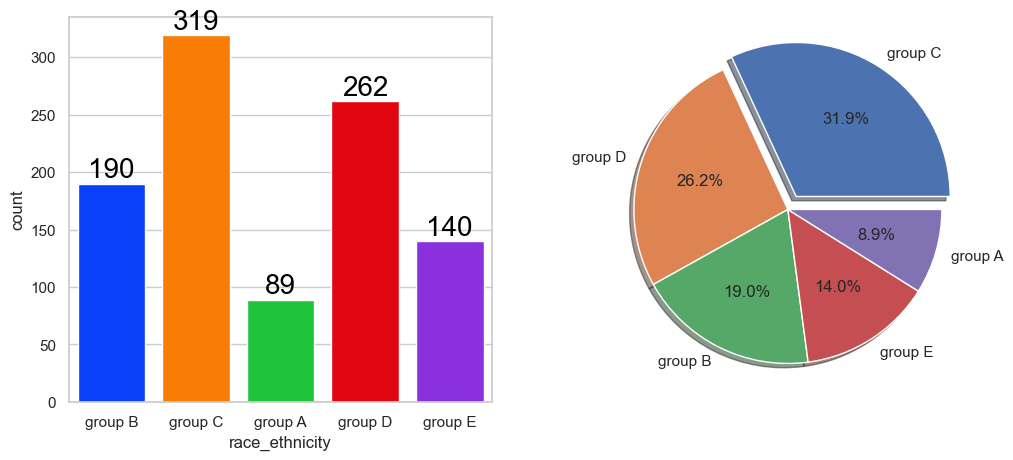

In [106]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

**BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )**

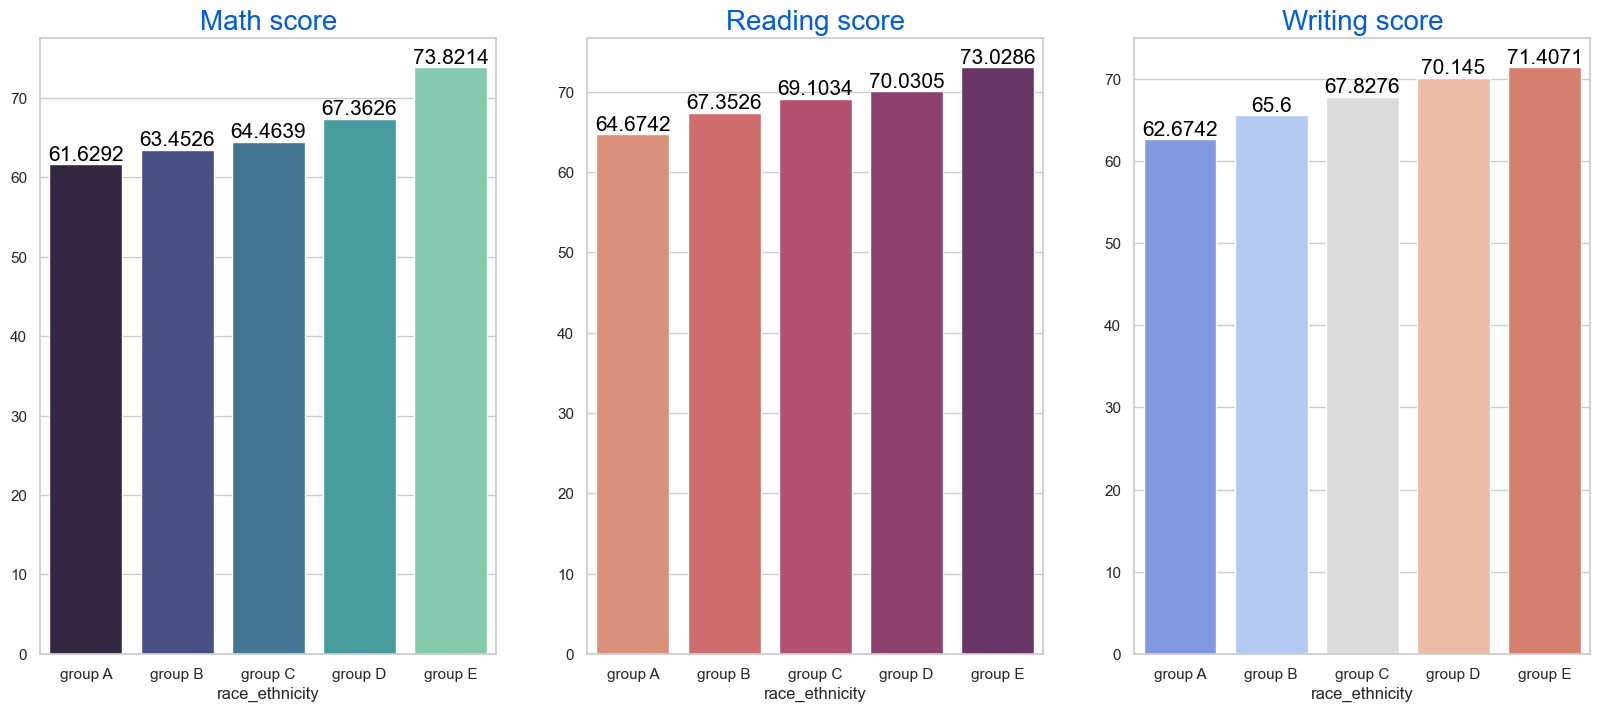

In [107]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3) Parental Level Of Education Column


- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

**UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )**

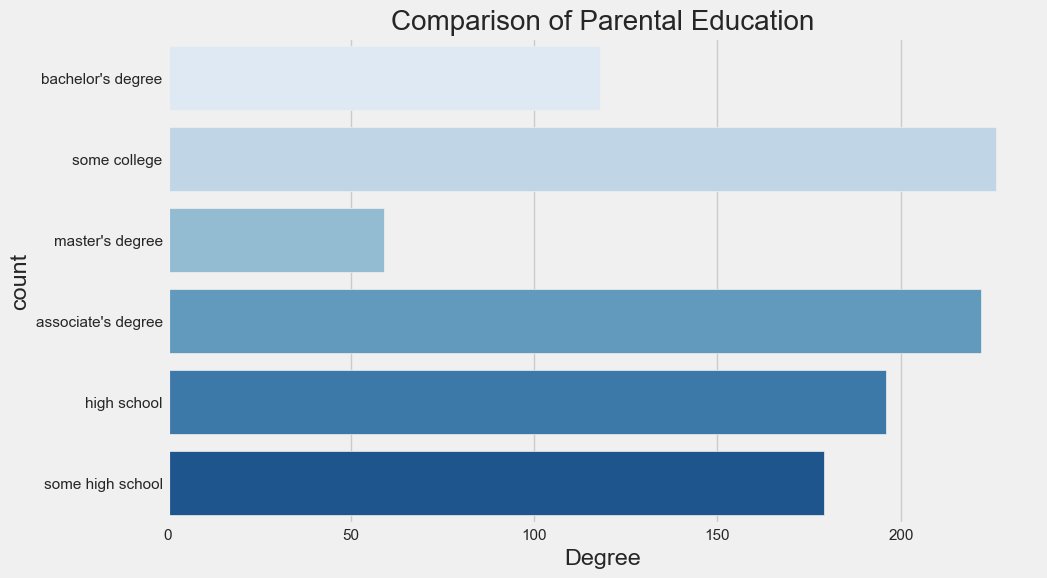

In [109]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

- Largest number of parents are from some college.

**BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )**

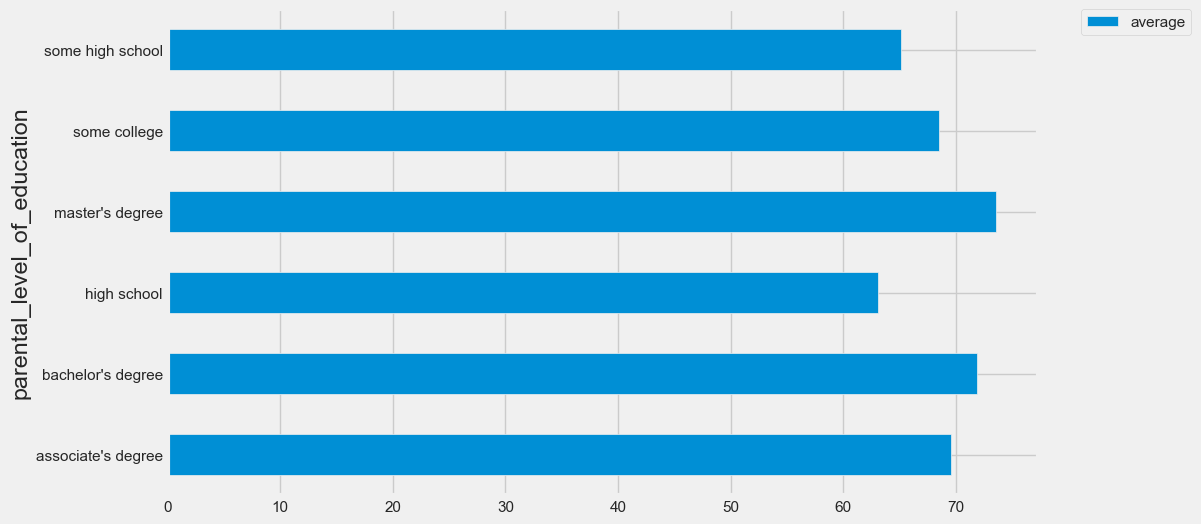

In [113]:
df.groupby('parental_level_of_education').agg({'average':'mean'}).plot(kind='barh',figsize=(10,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4) Lunch Column

- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

**UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )**

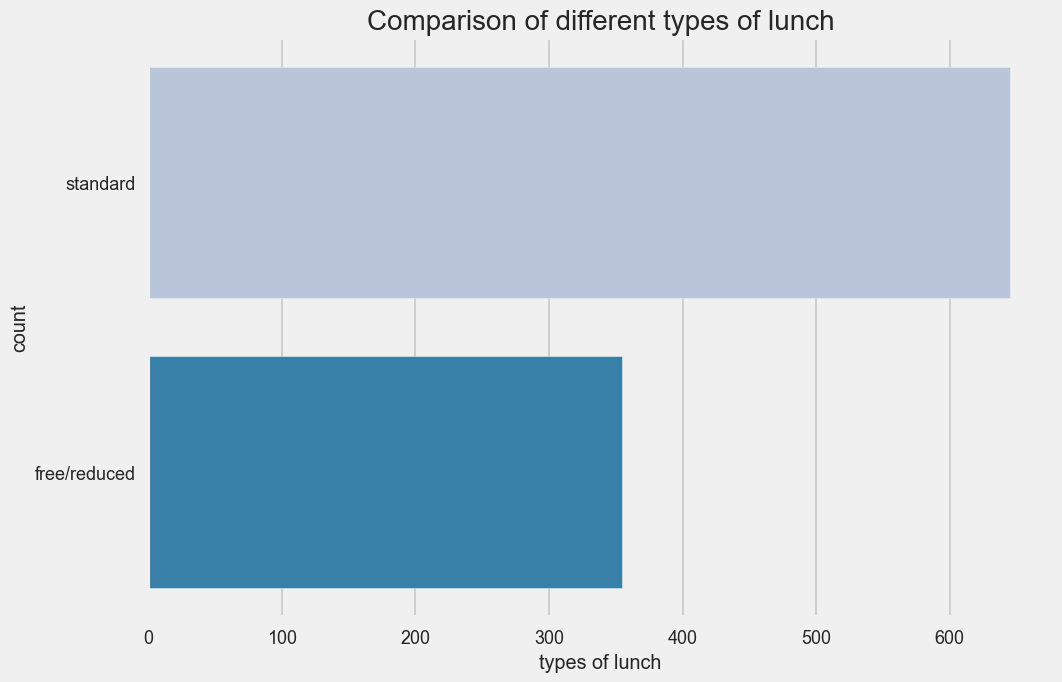

In [115]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

- Students being served Standard lunch was more than free lunch

**BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )**

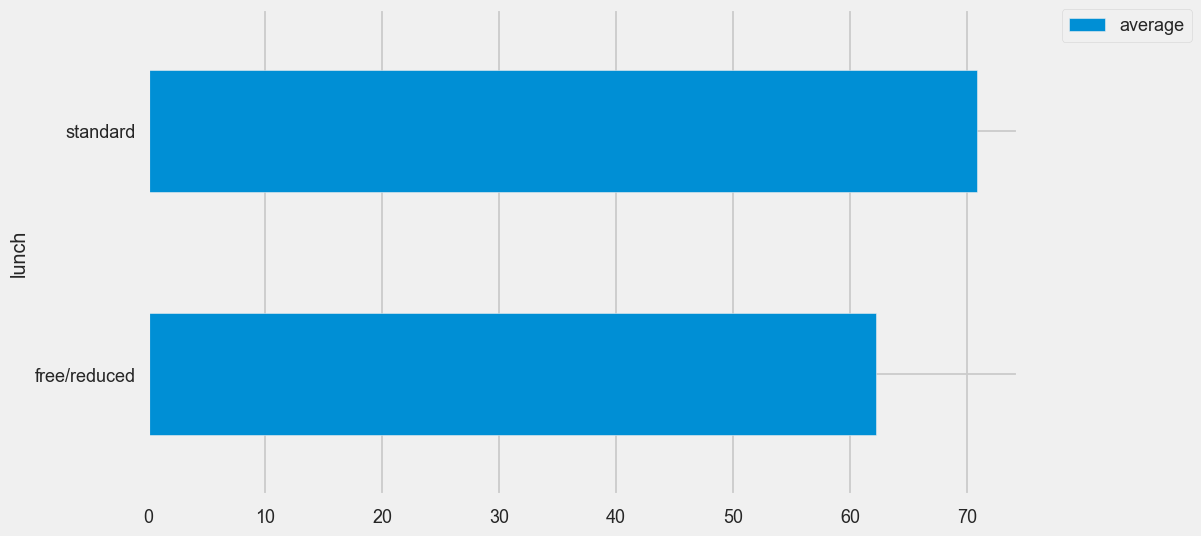

In [118]:
df.groupby('lunch').agg({'average':'mean'}).plot(kind='barh',figsize=(10,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5) Test Preparation Course Column
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

**BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )**

<Axes: xlabel='lunch', ylabel='writing_score'>

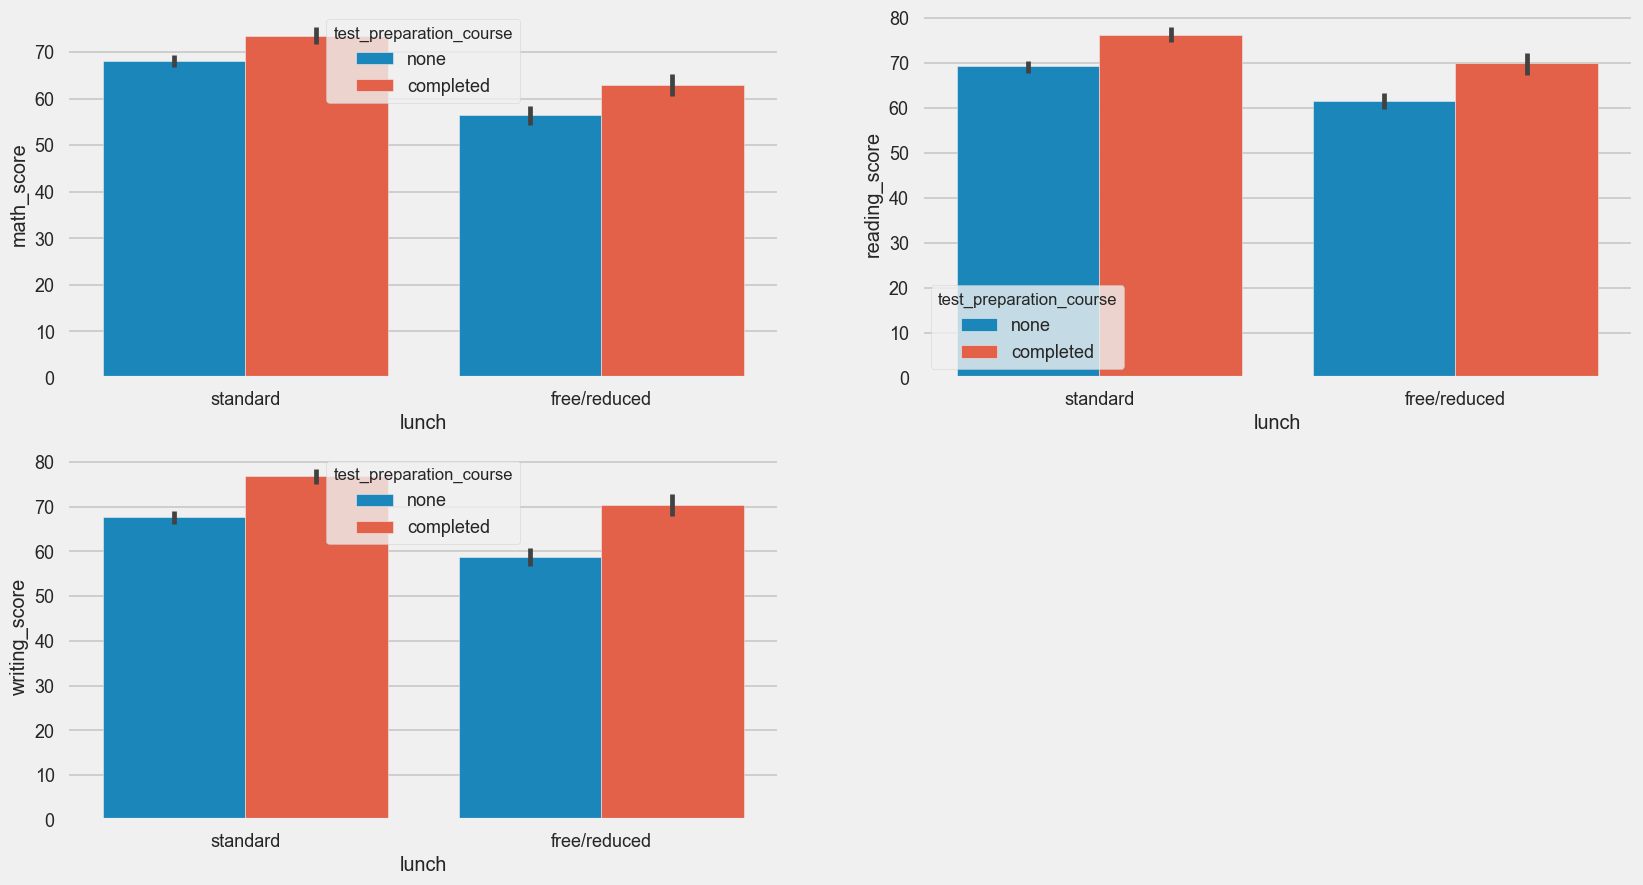

In [122]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6) Checking Outliers

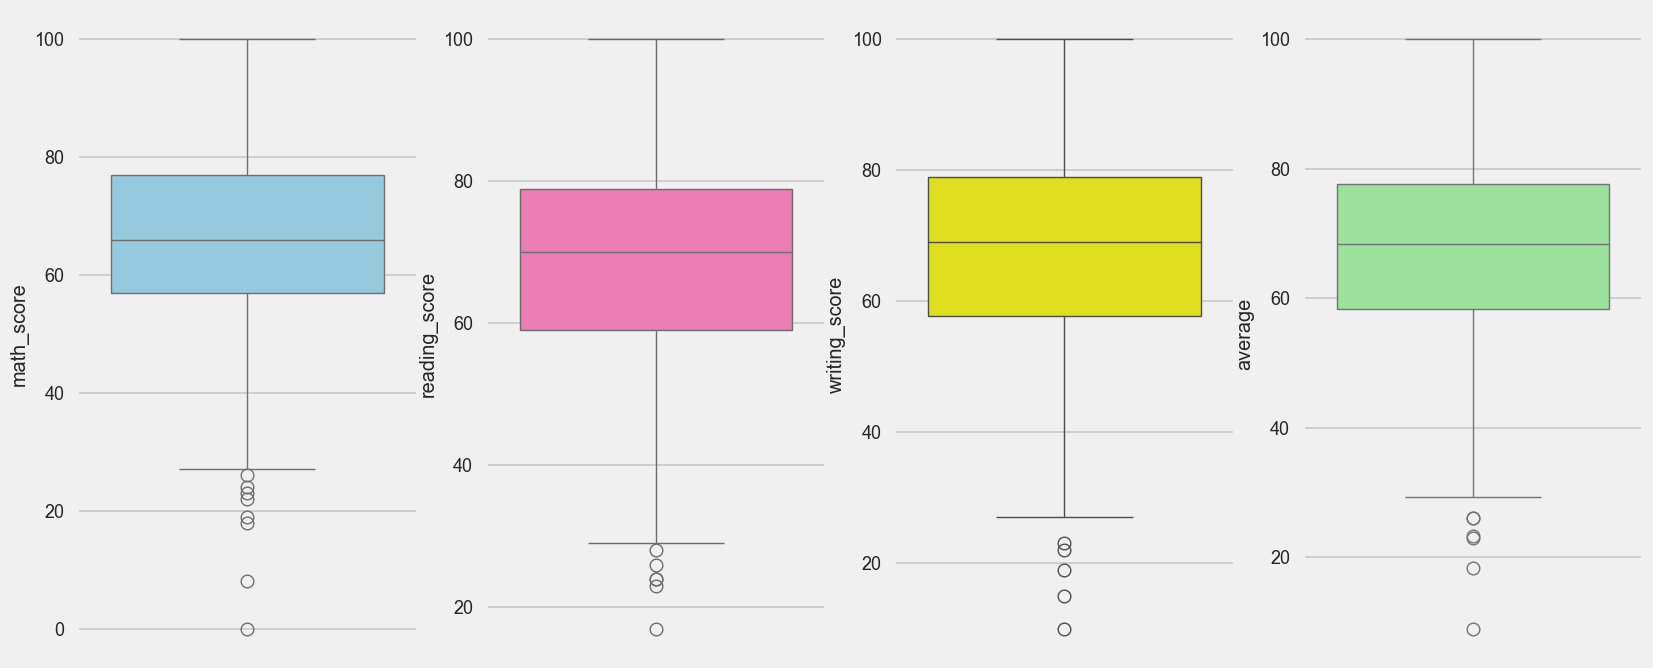

In [124]:
plt.subplots(1,4,figsize=(18,8))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7) Multivariate Analysis Using Pairplot

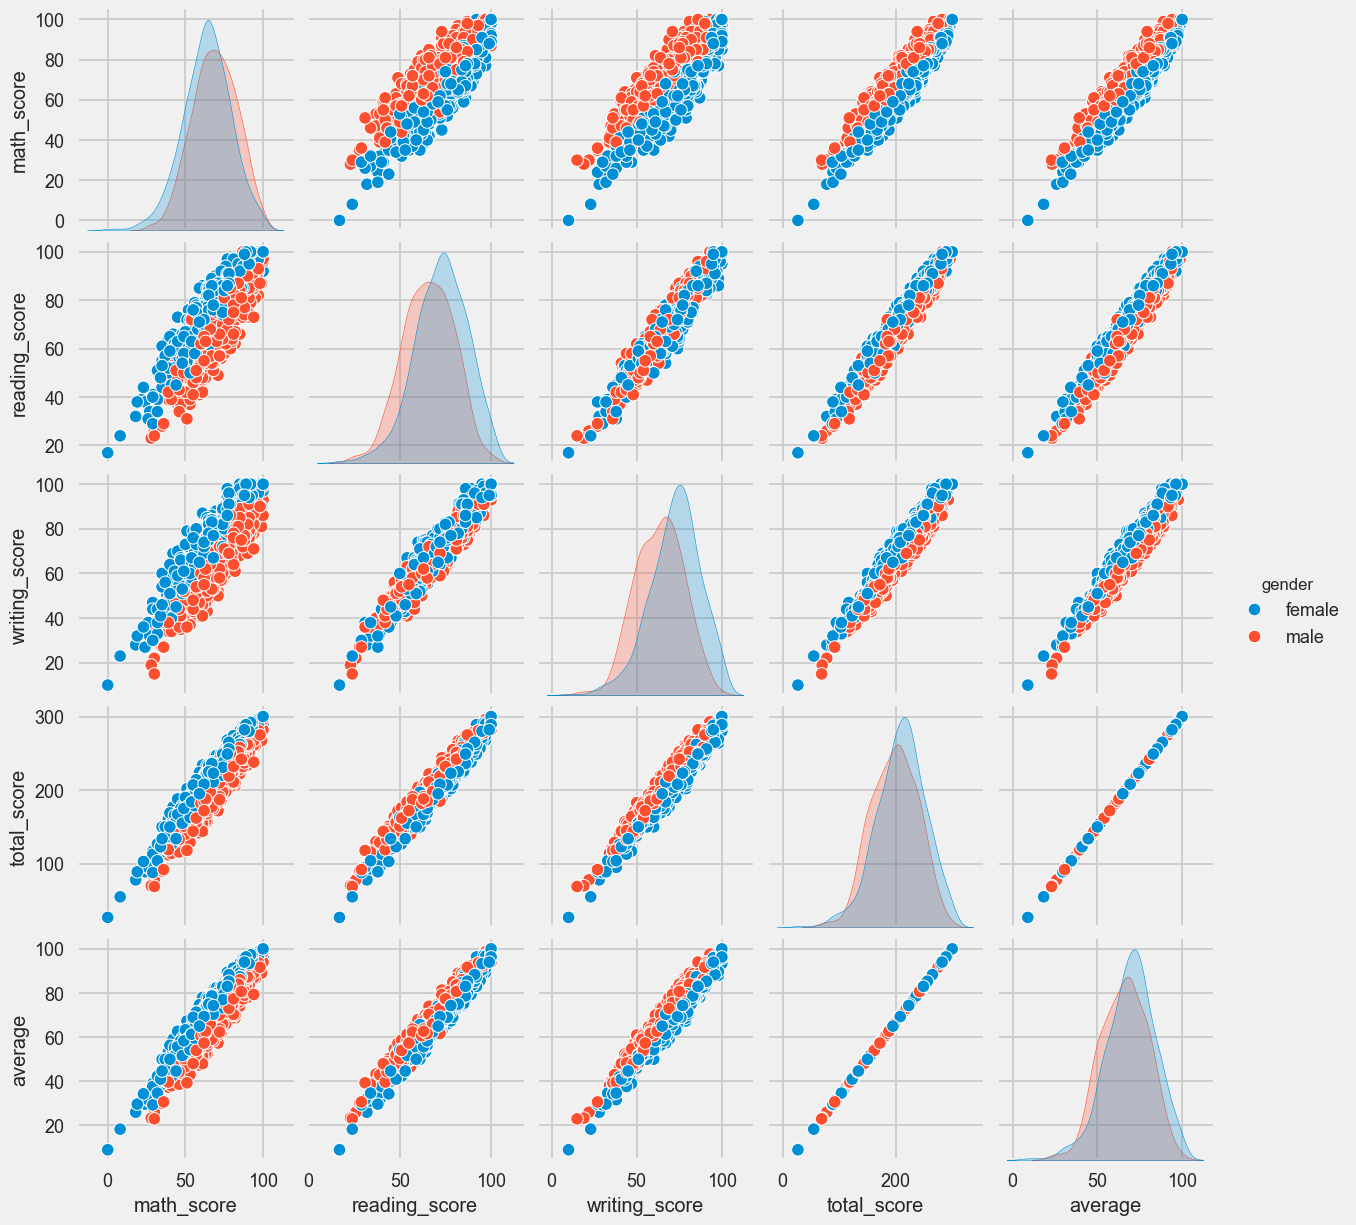

In [125]:
sns.pairplot(df,hue = 'gender')
plt.show()

- From the above plot it is clear that all the scores increase linearly with each other.

## 5.) Conclusions

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.